# Predict Student Performance from Game Play

Importing required libraries :
- Seaborn and matplotlib for data visulization and graphs
- Pandas for data manipulation and analysis
- Numpy for Numerical computing

In [1]:
import seaborn as sns
import pandas as pd 
import numpy as np
import matplotlib as plt

# Load the Dataset.

In [2]:
file_train = "C:/Users/PIYUSH/OneDrive/Desktop/Coding/ML-AI/Dataset/train.csv"
train_data = pd.read_csv(file_train)

In [3]:
train_data.head() #getting a rough idea of dataset

,session_id,index,elapsed_time,event_name,name,level,page,room_coor_x,room_coor_y,screen_coor_x,screen_coor_y,hover_duration,text,fqid,room_fqid,text_fqid,fullscreen,hq,music,level_group
0,20090312431273200,0,0,cutscene_click,basic,0,NaN,-413.991405,-159.314686,380.0,494.0,NaN,undefined,intro,tunic.historicalsociety.closet,tunic.historicalsociety.closet.intro,0,0,1,0-4
1,20090312431273200,1,1323,person_click,basic,0,NaN,-413.991405,-159.314686,380.0,494.0,NaN,"Whatcha doing over there, Jo?",gramps,tunic.historicalsociety.closet,tunic.historicalsociety.closet.gramps.intro_0_...,0,0,1,0-4
2,20090312431273200,2,831,person_click,basic,0,NaN,-413.991405,-159.314686,380.0,494.0,NaN,Just talking to Teddy.,gramps,tunic.historicalsociety.closet,tunic.historicalsociety.closet.gramps.intro_0_...,0,0,1,0-4
3,20090312431273200,3,1147,person_click,basic,0,NaN,-413.991405,-159.314686,380.0,494.0,NaN,I gotta run to my meeting!,gramps,tunic.historicalsociety.closet,tunic.historicalsociety.closet.gramps.intro_0_...,0,0,1,0-4
4,20090312431273200,4,1863,person_click,basic,0,NaN,-412.991405,-159.314686,381.0,494.0,NaN,"Can I come, Gramps?",gramps,tunic.historicalsociety.closet,tunic.historicalsociety.closet.gramps.intro_0_...,0,0,1,0-4


In [4]:
train_data.columns

Index(['session_id', 'index', 'elapsed_time', 'event_name', 'name', 'level',
       'page', 'room_coor_x', 'room_coor_y', 'screen_coor_x', 'screen_coor_y',
       'hover_duration', 'text', 'fqid', 'room_fqid', 'text_fqid',
       'fullscreen', 'hq', 'music', 'level_group'],
      dtype='object')

In [5]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26296946 entries, 0 to 26296945
Data columns (total 20 columns):
 #   Column          Dtype  
---  ------          -----  
 0   session_id      int64  
 1   index           int64  
 2   elapsed_time    int64  
 3   event_name      object 
 4   name            object 
 5   level           int64  
 6   page            float64
 7   room_coor_x     float64
 8   room_coor_y     float64
 9   screen_coor_x   float64
 10  screen_coor_y   float64
 11  hover_duration  float64
 12  text            object 
 13  fqid            object 
 14  room_fqid       object 
 15  text_fqid       object 
 16  fullscreen      int64  
 17  hq              int64  
 18  music           int64  
 19  level_group     object 
dtypes: float64(6), int64(7), object(7)
memory usage: 3.9+ GB


## Memory Optimization

When dealing with a large dataset, optimization becomes crucial. By default, Pandas assigns data types such as `float64`, `int64`, and `object`. However, these can be converted to lighter data types like `float32`, `int32`, `int8`, and others.

It's important to exercise caution and ensure that the data doesn't exceed the range of the new data types.


In [6]:
type_int8 = ['index', 'level', 'fullscreen', 'hq', 'music']
for x in type_int8 :
    train_data[x] = train_data[x].astype('int8')

In [7]:
float_data=['room_coor_x', 'room_coor_y', 'screen_coor_x', 'screen_coor_y']
for x in float_data :
    train_data[x] = train_data[x].astype('float32')

In [8]:
object_data =  ['event_name', 'name', 'room_fqid']
for x in object_data :
    train_data[x] = train_data[x].astype('category')

In [9]:
train_data['session_id'] = train_data['session_id'].astype('int64')
train_data['elapsed_time'] = train_data['elapsed_time'].astype('int32')

In [10]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26296946 entries, 0 to 26296945
Data columns (total 20 columns):
 #   Column          Dtype   
---  ------          -----   
 0   session_id      int64   
 1   index           int8    
 2   elapsed_time    int32   
 3   event_name      category
 4   name            category
 5   level           int8    
 6   page            float64 
 7   room_coor_x     float32 
 8   room_coor_y     float32 
 9   screen_coor_x   float32 
 10  screen_coor_y   float32 
 11  hover_duration  float64 
 12  text            object  
 13  fqid            object  
 14  room_fqid       category
 15  text_fqid       object  
 16  fullscreen      int8    
 17  hq              int8    
 18  music           int8    
 19  level_group     object  
dtypes: category(3), float32(4), float64(2), int32(1), int64(1), int8(5), object(4)
memory usage: 2.1+ GB


# Removal of NULL and Duplicated values

In [11]:
train_data.shape

(26296946, 20)

In [12]:
train_data.isnull().mean()*100

session_id         0.000000
index              0.000000
elapsed_time       0.000000
event_name         0.000000
name               0.000000
level              0.000000
page              97.853196
room_coor_x        7.884079
room_coor_y        7.884079
screen_coor_x      7.884079
screen_coor_y      7.884079
hover_duration    92.386021
text              63.428685
fqid              31.465308
room_fqid          0.000000
text_fqid         63.428286
fullscreen         0.000000
hq                 0.000000
music              0.000000
level_group        0.000000
dtype: float64

In [13]:
train_data.duplicated().mean()*100

0.0

For the sake of simplicity, we have removed columns that have more than 30% of the data as NULL.

Since there are no duplicated values, we do not need to worry about handling duplicates.


In [14]:
for x in train_data.columns :
    if train_data[x].isnull().mean()*100 >= 30 :
        train_data = train_data.drop(x, axis = 'columns')

Since, all the null values are present in columns with datatypes int or float we can perform mean imputation.

Mean imputation is a simple method used to handle missing values in a dataset. It involves calculating the mean of the non-null values in a column and replacing the null values with that mean value. By doing so, you can retain the overall average or central tendency of the data while filling in the missing values.

In [15]:
for x in train_data.columns :
    if train_data[x].isnull().mean()*100 > 0 :
        train_data[x]=train_data[x].fillna(train_data[x].mean())

In [16]:
# It is better to drop 'hq' and 'index' as it plays negligible role as deciding factor.

In [17]:
train_data = train_data.drop('index',axis=1) 
train_data = train_data.drop('hq',axis=1)

Finally, the `train_data` has been optimized and now contains only the necessary features required for model training.


In [18]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26296946 entries, 0 to 26296945
Data columns (total 13 columns):
 #   Column         Dtype   
---  ------         -----   
 0   session_id     int64   
 1   elapsed_time   int32   
 2   event_name     category
 3   name           category
 4   level          int8    
 5   room_coor_x    float32 
 6   room_coor_y    float32 
 7   screen_coor_x  float32 
 8   screen_coor_y  float32 
 9   room_fqid      category
 10  fullscreen     int8    
 11  music          int8    
 12  level_group    object  
dtypes: category(3), float32(4), int32(1), int64(1), int8(3), object(1)
memory usage: 1.0+ GB


In [19]:
train_data.head()

,session_id,elapsed_time,event_name,name,level,room_coor_x,room_coor_y,screen_coor_x,screen_coor_y,room_fqid,fullscreen,music,level_group
0,20090312431273200,0,cutscene_click,basic,0,-413.991394,-159.314682,380.0,494.0,tunic.historicalsociety.closet,0,1,0-4
1,20090312431273200,1323,person_click,basic,0,-413.991394,-159.314682,380.0,494.0,tunic.historicalsociety.closet,0,1,0-4
2,20090312431273200,831,person_click,basic,0,-413.991394,-159.314682,380.0,494.0,tunic.historicalsociety.closet,0,1,0-4
3,20090312431273200,1147,person_click,basic,0,-413.991394,-159.314682,380.0,494.0,tunic.historicalsociety.closet,0,1,0-4
4,20090312431273200,1863,person_click,basic,0,-412.991394,-159.314682,381.0,494.0,tunic.historicalsociety.closet,0,1,0-4


# Label dataset  

Loading the 'train_label.csv' file as 'train_labels'.

In [20]:
path_labels = "C:/Users/PIYUSH/OneDrive/Desktop/Coding/ML-AI/Dataset/train_labels.csv"
train_labels = pd.read_csv(path_labels)

In [21]:
# Getting a rough idea about the data

In [22]:
train_labels.head()

,session_id,correct
0,20090312431273200_q1,1
1,20090312433251036_q1,0
2,20090312455206810_q1,1
3,20090313091715820_q1,0
4,20090313571836404_q1,1


In [23]:
train_labels.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 424116 entries, 0 to 424115
Data columns (total 2 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   session_id  424116 non-null  object
 1   correct     424116 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 6.5+ MB


In [24]:
train_labels.shape

(424116, 2)

In [25]:
df_correct = train_labels.correct.value_counts()
df_correct

1    299271
0    124845
Name: correct, dtype: int64

<Axes: xlabel='correct', ylabel='count'>

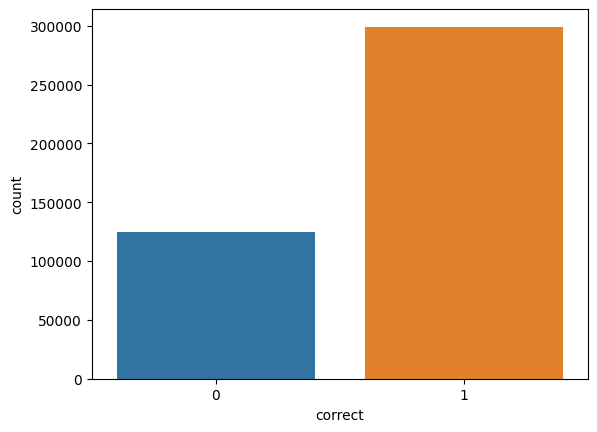

In [26]:
sns.countplot(x = train_labels['correct'],data=train_labels)

The `session_id` is formed by combining the `session` and `question` values.


In [27]:
train_labels['session'] = train_labels.session_id.apply(lambda x : int(x.split('_')[0]))        # New column 'sesion'
train_labels['question'] = train_labels.session_id.apply(lambda x : int(x.split('_')[-1][1:]))  # New column 'question'

In [28]:
train_labels.head()

,session_id,correct,session,question
0,20090312431273200_q1,1,20090312431273200,1
1,20090312433251036_q1,0,20090312433251036,1
2,20090312455206810_q1,1,20090312455206810,1
3,20090313091715820_q1,0,20090313091715820,1
4,20090313571836404_q1,1,20090313571836404,1


Storing categorical and numerical data columns separately for future use.

In [29]:
cate = ['event_name','name','room_fqid']
nume = ['elapsed_time','level', 'fullscreen', 'music', 'room_coor_x', 'room_coor_y', 'screen_coor_x','screen_coor_y']

# Feature Engineering 

Transforming the original data into a format that is more suitable for machine learning algorithms, improving their performance and accuracy. 

In [30]:
df = train_data
df.head()

,session_id,elapsed_time,event_name,name,level,room_coor_x,room_coor_y,screen_coor_x,screen_coor_y,room_fqid,fullscreen,music,level_group
0,20090312431273200,0,cutscene_click,basic,0,-413.991394,-159.314682,380.0,494.0,tunic.historicalsociety.closet,0,1,0-4
1,20090312431273200,1323,person_click,basic,0,-413.991394,-159.314682,380.0,494.0,tunic.historicalsociety.closet,0,1,0-4
2,20090312431273200,831,person_click,basic,0,-413.991394,-159.314682,380.0,494.0,tunic.historicalsociety.closet,0,1,0-4
3,20090312431273200,1147,person_click,basic,0,-413.991394,-159.314682,380.0,494.0,tunic.historicalsociety.closet,0,1,0-4
4,20090312431273200,1863,person_click,basic,0,-412.991394,-159.314682,381.0,494.0,tunic.historicalsociety.closet,0,1,0-4


In [31]:
df.columns

Index(['session_id', 'elapsed_time', 'event_name', 'name', 'level',
       'room_coor_x', 'room_coor_y', 'screen_coor_x', 'screen_coor_y',
       'room_fqid', 'fullscreen', 'music', 'level_group'],
      dtype='object')

In [32]:
# Feature Engineering function 

In [33]:
def feature_engg(df):
    df_out = []
    
    # Aggregating the categorical data using the no of unique entries.
    for x in cate :
        tmp = df.groupby(['session_id','level_group'])[x].agg('nunique')  
        df_out.append(tmp)
       
    # Aggregating the numerical data using meand and standard deviation    
    for x in nume :
        tmp = df.groupby(['session_id','level_group'])[x].agg('mean')
        tmp.name = tmp.name + '_mean'
        df_out.append(tmp)
        
    for x in nume :
        tmp = df.groupby(['session_id','level_group'])[x].agg('std')
        tmp.name = tmp.name + '_std'
        df_out.append(tmp)
        
        
    df = pd.concat(df_out,axis=1)
    
    # Setting the new index column
    df = df.reset_index()
    df = df.set_index('session_id')
    
    return df
        

In [34]:
# Applying feature_engg function to our dataset
df = feature_engg(df) 

df.shape

(70686, 20)

In [35]:
# Peeking into data
df.head() 

,level_group,event_name,name,room_fqid,elapsed_time_mean,level_mean,fullscreen_mean,music_mean,room_coor_x_mean,room_coor_y_mean,screen_coor_x_mean,screen_coor_y_mean,elapsed_time_std,level_std,fullscreen_std,music_std,room_coor_x_std,room_coor_y_std,screen_coor_x_std,screen_coor_y_std
session_id,,,,,,,,,,,,,,,,,,,,
20090312431273200,0-4,10,3,7,8.579356e+04,1.945455,0.0,1.0,4.286342,-73.857285,448.955688,383.183472,49246.539458,1.230975,0.0,0.0,388.447019,126.108221,208.904380,101.188174
20090312431273200,13-22,10,3,12,1.040601e+06,17.402381,0.0,1.0,-125.317749,-158.951492,443.551147,379.720001,126666.129584,2.358652,0.0,0.0,601.212445,222.834095,232.147006,95.713359
20090312431273200,5-12,10,3,11,3.572052e+05,8.054054,0.0,1.0,7.057520,-63.442371,452.627380,379.497162,80175.676658,2.096919,0.0,0.0,338.603398,131.240519,192.302183,113.780735
20090312433251036,0-4,11,4,6,9.763342e+04,1.870504,0.0,0.0,-82.159187,-57.720493,364.709991,371.685425,67372.714092,1.232616,0.0,0.0,431.252094,151.795230,245.430824,117.106214
20090312433251036,13-22,11,6,16,2.498852e+06,17.762529,0.0,0.0,-35.471855,-137.663406,461.985870,387.472809,777382.529186,1.825923,0.0,0.0,475.177396,210.436970,232.614054,119.627699


Our `train_data` is reduced to a much more suitable form with a datframe shape of (70686,20)

# Basic exploration of the prepared dataset 

<Axes: xlabel='level_mean', ylabel='elapsed_time_mean'>

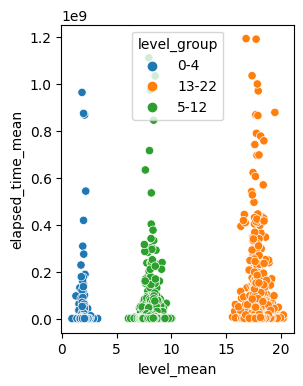

In [36]:
plt.pyplot.figure(figsize=(3,4))
sns.scatterplot(data = df, x = "level_mean", y="elapsed_time_mean", hue = "level_group")

<Axes: xlabel='room_coor_x_mean', ylabel='room_coor_y_mean'>

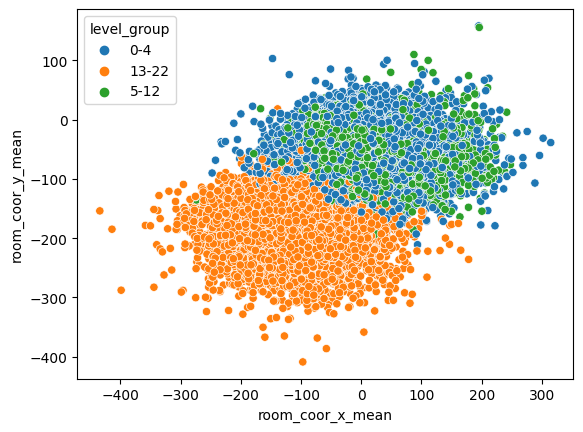

In [37]:
sns.scatterplot(data=df, x = "room_coor_x_mean", y="room_coor_y_mean", hue = "level_group")

<Axes: xlabel='screen_coor_x_mean', ylabel='screen_coor_y_mean'>

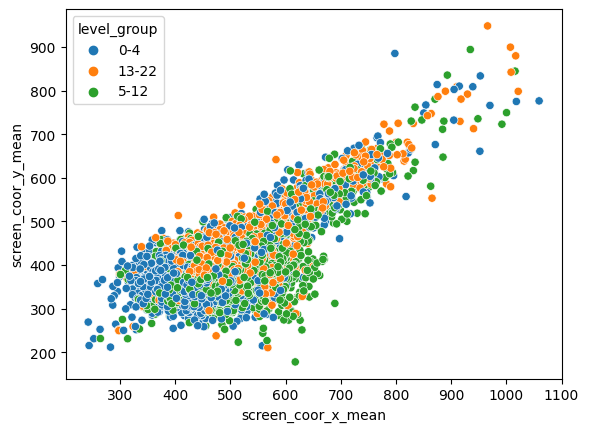

In [38]:
sns.scatterplot(data=df, x = "screen_coor_x_mean", y="screen_coor_y_mean", hue = "level_group")

In [39]:
df['music_std'].value_counts(normalize=True)

0.0    1.0
Name: music_std, dtype: float64

In [40]:
df['fullscreen_std'].value_counts(normalize=True)

0.0    1.0
Name: fullscreen_std, dtype: float64

removing `fullscreen_std` and `music_std` they have same value for every data.

In [41]:
df = df.drop('fullscreen_std',axis=1)
df = df.drop('music_std',axis=1)

In [42]:
df['fullscreen_mean'].value_counts(normalize=True)

0.0    0.861217
1.0    0.138783
Name: fullscreen_mean, dtype: float64

<Axes: xlabel='fullscreen_mean', ylabel='count'>

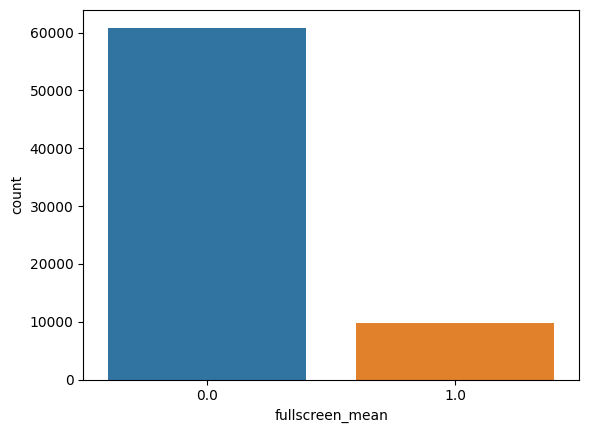

In [43]:
sns.countplot(x=df['fullscreen_mean'])

<Axes: xlabel='music_mean', ylabel='count'>

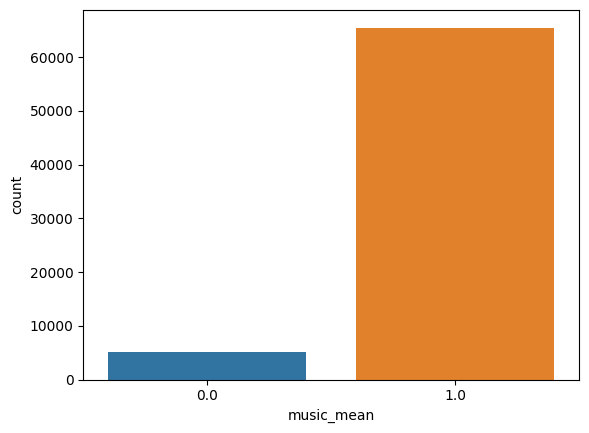

In [44]:
sns.countplot(x=df['music_mean'])

In [45]:
df['music_mean'].value_counts(normalize=True)

1.0    0.926449
0.0    0.073551
Name: music_mean, dtype: float64

Removing `music_mean` as it doesnot play significant role in desicion making.

In [46]:
df = df.drop('music_mean', axis=1)

### Spliting for test and validation data

In [47]:
def split_df(df,ratio=0.20) :
    user_list = df.index.unique()
    split =int(len(user_list)*(1-ratio))
    train_x,valid_x = df.loc[user_list[0:split]],df.loc[user_list[split:]]
    return train_x,valid_x
train_x,valid_x = split_df(df)

`train_x` is our training part of data and `valid_x` is our validation part.

# Model Training

We are using `GradientBoostingclassifier` and `RandomForestClassifier` from `Sci-ket Learn` Library

In [48]:
from sklearn.metrics import accuracy_score

In [49]:
# Empty Dictionaries for storing trained models for 18 different quetions  
model_tree = {}
model_boost = {}

#Empty Dictionarie for storing accuracy of models obtained
accuracy_tree = {}
accuracy_boost = {}

### Random Forest Calssifier

In [50]:
from sklearn.ensemble import RandomForestClassifier

for q_no in range(1,19):
    
    # Selecting the level_group
    if q_no <= 4 : grp = '0-4'
    elif q_no <= 12 : grp = '5-12'
    elif q_no <= 22 : grp = '13-22'
        
    print("For question no ",q_no)
    
    # Segregating data based on level_group
    train_df = train_x.loc[train_x.level_group==grp]
    train_users = train_df.index.values
    valid_df = valid_x.loc[valid_x.level_group==grp]
    valid_users = valid_df.index.values
    
    # Filtering the required labels based on session_id or index of tarin_df and valid_df
    labels_train = train_labels.loc[train_labels.question==q_no].set_index('session').loc[train_users]
    labels_valid = train_labels.loc[train_labels.question==q_no].set_index('session').loc[valid_users]
    train_df.loc[:,'correct']=labels_train['correct']
    valid_df.loc[:,'correct']=labels_valid['correct']
    
    # Dropping level_group as it is no longer required for training the model
    train_df = train_df.drop('level_group',axis=1)
    valid_df = valid_df.drop('level_group',axis=1)
    
    # Selecting the X and Y values for model training and validation
    Y_train = train_df['correct']
    Y_valid = valid_df['correct']
    X_train = train_df.drop('correct',axis=1)
    X_valid = valid_df.drop('correct',axis=1)
    
    # Training our model
    forest = RandomForestClassifier()
    forest.fit(X_train,Y_train)
    
    # Storing the model in model dictionary
    model_tree[f'{q_no}']=forest
    
    # Validating and storing the accuracy score in accuracy dictionary
    label_pred = forest.predict(X_valid)
    accuracy_tree[f'{q_no}']=accuracy_score(Y_valid, label_pred)

For question no  1


C:\Users\PIYUSH\AppData\Local\Temp\ipykernel_23268\2245190575.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df.loc[:,'correct']=labels_train['correct']
C:\Users\PIYUSH\AppData\Local\Temp\ipykernel_23268\2245190575.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_df.loc[:,'correct']=labels_valid['correct']


For question no  2


C:\Users\PIYUSH\AppData\Local\Temp\ipykernel_23268\2245190575.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df.loc[:,'correct']=labels_train['correct']
C:\Users\PIYUSH\AppData\Local\Temp\ipykernel_23268\2245190575.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_df.loc[:,'correct']=labels_valid['correct']


For question no  3


C:\Users\PIYUSH\AppData\Local\Temp\ipykernel_23268\2245190575.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df.loc[:,'correct']=labels_train['correct']
C:\Users\PIYUSH\AppData\Local\Temp\ipykernel_23268\2245190575.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_df.loc[:,'correct']=labels_valid['correct']


For question no  4


C:\Users\PIYUSH\AppData\Local\Temp\ipykernel_23268\2245190575.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df.loc[:,'correct']=labels_train['correct']
C:\Users\PIYUSH\AppData\Local\Temp\ipykernel_23268\2245190575.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_df.loc[:,'correct']=labels_valid['correct']


For question no  5


C:\Users\PIYUSH\AppData\Local\Temp\ipykernel_23268\2245190575.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df.loc[:,'correct']=labels_train['correct']
C:\Users\PIYUSH\AppData\Local\Temp\ipykernel_23268\2245190575.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_df.loc[:,'correct']=labels_valid['correct']


For question no  6


C:\Users\PIYUSH\AppData\Local\Temp\ipykernel_23268\2245190575.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df.loc[:,'correct']=labels_train['correct']
C:\Users\PIYUSH\AppData\Local\Temp\ipykernel_23268\2245190575.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_df.loc[:,'correct']=labels_valid['correct']


For question no  7


C:\Users\PIYUSH\AppData\Local\Temp\ipykernel_23268\2245190575.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df.loc[:,'correct']=labels_train['correct']
C:\Users\PIYUSH\AppData\Local\Temp\ipykernel_23268\2245190575.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_df.loc[:,'correct']=labels_valid['correct']


For question no  8


C:\Users\PIYUSH\AppData\Local\Temp\ipykernel_23268\2245190575.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df.loc[:,'correct']=labels_train['correct']
C:\Users\PIYUSH\AppData\Local\Temp\ipykernel_23268\2245190575.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_df.loc[:,'correct']=labels_valid['correct']


For question no  9


C:\Users\PIYUSH\AppData\Local\Temp\ipykernel_23268\2245190575.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df.loc[:,'correct']=labels_train['correct']
C:\Users\PIYUSH\AppData\Local\Temp\ipykernel_23268\2245190575.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_df.loc[:,'correct']=labels_valid['correct']


For question no  10


C:\Users\PIYUSH\AppData\Local\Temp\ipykernel_23268\2245190575.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df.loc[:,'correct']=labels_train['correct']
C:\Users\PIYUSH\AppData\Local\Temp\ipykernel_23268\2245190575.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_df.loc[:,'correct']=labels_valid['correct']


For question no  11


C:\Users\PIYUSH\AppData\Local\Temp\ipykernel_23268\2245190575.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df.loc[:,'correct']=labels_train['correct']
C:\Users\PIYUSH\AppData\Local\Temp\ipykernel_23268\2245190575.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_df.loc[:,'correct']=labels_valid['correct']


For question no  12


C:\Users\PIYUSH\AppData\Local\Temp\ipykernel_23268\2245190575.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df.loc[:,'correct']=labels_train['correct']
C:\Users\PIYUSH\AppData\Local\Temp\ipykernel_23268\2245190575.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_df.loc[:,'correct']=labels_valid['correct']


For question no  13


C:\Users\PIYUSH\AppData\Local\Temp\ipykernel_23268\2245190575.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df.loc[:,'correct']=labels_train['correct']
C:\Users\PIYUSH\AppData\Local\Temp\ipykernel_23268\2245190575.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_df.loc[:,'correct']=labels_valid['correct']


For question no  14


C:\Users\PIYUSH\AppData\Local\Temp\ipykernel_23268\2245190575.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df.loc[:,'correct']=labels_train['correct']
C:\Users\PIYUSH\AppData\Local\Temp\ipykernel_23268\2245190575.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_df.loc[:,'correct']=labels_valid['correct']


For question no  15


C:\Users\PIYUSH\AppData\Local\Temp\ipykernel_23268\2245190575.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df.loc[:,'correct']=labels_train['correct']
C:\Users\PIYUSH\AppData\Local\Temp\ipykernel_23268\2245190575.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_df.loc[:,'correct']=labels_valid['correct']


For question no  16


C:\Users\PIYUSH\AppData\Local\Temp\ipykernel_23268\2245190575.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df.loc[:,'correct']=labels_train['correct']
C:\Users\PIYUSH\AppData\Local\Temp\ipykernel_23268\2245190575.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_df.loc[:,'correct']=labels_valid['correct']


For question no  17


C:\Users\PIYUSH\AppData\Local\Temp\ipykernel_23268\2245190575.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df.loc[:,'correct']=labels_train['correct']
C:\Users\PIYUSH\AppData\Local\Temp\ipykernel_23268\2245190575.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_df.loc[:,'correct']=labels_valid['correct']


For question no  18


C:\Users\PIYUSH\AppData\Local\Temp\ipykernel_23268\2245190575.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df.loc[:,'correct']=labels_train['correct']
C:\Users\PIYUSH\AppData\Local\Temp\ipykernel_23268\2245190575.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_df.loc[:,'correct']=labels_valid['correct']


### Gradient Boost Classifier

In [51]:
from sklearn.ensemble import GradientBoostingClassifier
for q_no in range(1,19):
    
    # Selecting the level_group
    if q_no <= 4 : grp = '0-4'
    elif q_no <= 12 : grp = '5-12'
    elif q_no <= 22 : grp = '13-22'
        
    print("For question no ",q_no)
    
    # Segregating data based on level_group
    train_df = train_x.loc[train_x.level_group==grp]
    train_users = train_df.index.values
    valid_df = valid_x.loc[valid_x.level_group==grp]
    valid_users = valid_df.index.values
    
    # Filtering the required labels based on session_id or index of tarin_df and valid_df
    labels_train = train_labels.loc[train_labels.question==q_no].set_index('session').loc[train_users]
    labels_valid = train_labels.loc[train_labels.question==q_no].set_index('session').loc[valid_users]
    train_df.loc[:,'correct']=labels_train['correct']
    valid_df.loc[:,'correct']=labels_valid['correct']
    
    # Dropping level_group as it is no longer required for training the model
    train_df = train_df.drop('level_group',axis=1)
    valid_df = valid_df.drop('level_group',axis=1)
    
    # Selecting the X and Y values for model training and validation
    Y_train = train_df['correct']
    Y_valid = valid_df['correct']
    X_train = train_df.drop('correct',axis=1)
    X_valid = valid_df.drop('correct',axis=1)
    
    # Training our model
    boost = GradientBoostingClassifier()
    boost.fit(X_train,Y_train)
    
    # Storing the model in model dictionary
    model_boost[f'{q_no}']=boost
    
    # Validating and storing the accuracy score in accuracy dictionary
    label_pred = boost.predict(X_valid)
    accuracy_boost[f'{q_no}']=accuracy_score(Y_valid, label_pred)

For question no  1


C:\Users\PIYUSH\AppData\Local\Temp\ipykernel_23268\3144057717.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df.loc[:,'correct']=labels_train['correct']
C:\Users\PIYUSH\AppData\Local\Temp\ipykernel_23268\3144057717.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_df.loc[:,'correct']=labels_valid['correct']


For question no  2


C:\Users\PIYUSH\AppData\Local\Temp\ipykernel_23268\3144057717.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df.loc[:,'correct']=labels_train['correct']
C:\Users\PIYUSH\AppData\Local\Temp\ipykernel_23268\3144057717.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_df.loc[:,'correct']=labels_valid['correct']


For question no  3


C:\Users\PIYUSH\AppData\Local\Temp\ipykernel_23268\3144057717.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df.loc[:,'correct']=labels_train['correct']
C:\Users\PIYUSH\AppData\Local\Temp\ipykernel_23268\3144057717.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_df.loc[:,'correct']=labels_valid['correct']


For question no  4


C:\Users\PIYUSH\AppData\Local\Temp\ipykernel_23268\3144057717.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df.loc[:,'correct']=labels_train['correct']
C:\Users\PIYUSH\AppData\Local\Temp\ipykernel_23268\3144057717.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_df.loc[:,'correct']=labels_valid['correct']


For question no  5


C:\Users\PIYUSH\AppData\Local\Temp\ipykernel_23268\3144057717.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df.loc[:,'correct']=labels_train['correct']
C:\Users\PIYUSH\AppData\Local\Temp\ipykernel_23268\3144057717.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_df.loc[:,'correct']=labels_valid['correct']


For question no  6


C:\Users\PIYUSH\AppData\Local\Temp\ipykernel_23268\3144057717.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df.loc[:,'correct']=labels_train['correct']
C:\Users\PIYUSH\AppData\Local\Temp\ipykernel_23268\3144057717.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_df.loc[:,'correct']=labels_valid['correct']


For question no  7


C:\Users\PIYUSH\AppData\Local\Temp\ipykernel_23268\3144057717.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df.loc[:,'correct']=labels_train['correct']
C:\Users\PIYUSH\AppData\Local\Temp\ipykernel_23268\3144057717.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_df.loc[:,'correct']=labels_valid['correct']


For question no  8


C:\Users\PIYUSH\AppData\Local\Temp\ipykernel_23268\3144057717.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df.loc[:,'correct']=labels_train['correct']
C:\Users\PIYUSH\AppData\Local\Temp\ipykernel_23268\3144057717.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_df.loc[:,'correct']=labels_valid['correct']


For question no  9


C:\Users\PIYUSH\AppData\Local\Temp\ipykernel_23268\3144057717.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df.loc[:,'correct']=labels_train['correct']
C:\Users\PIYUSH\AppData\Local\Temp\ipykernel_23268\3144057717.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_df.loc[:,'correct']=labels_valid['correct']


For question no  10


C:\Users\PIYUSH\AppData\Local\Temp\ipykernel_23268\3144057717.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df.loc[:,'correct']=labels_train['correct']
C:\Users\PIYUSH\AppData\Local\Temp\ipykernel_23268\3144057717.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_df.loc[:,'correct']=labels_valid['correct']


For question no  11


C:\Users\PIYUSH\AppData\Local\Temp\ipykernel_23268\3144057717.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df.loc[:,'correct']=labels_train['correct']
C:\Users\PIYUSH\AppData\Local\Temp\ipykernel_23268\3144057717.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_df.loc[:,'correct']=labels_valid['correct']


For question no  12


C:\Users\PIYUSH\AppData\Local\Temp\ipykernel_23268\3144057717.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df.loc[:,'correct']=labels_train['correct']
C:\Users\PIYUSH\AppData\Local\Temp\ipykernel_23268\3144057717.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_df.loc[:,'correct']=labels_valid['correct']


For question no  13


C:\Users\PIYUSH\AppData\Local\Temp\ipykernel_23268\3144057717.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df.loc[:,'correct']=labels_train['correct']
C:\Users\PIYUSH\AppData\Local\Temp\ipykernel_23268\3144057717.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_df.loc[:,'correct']=labels_valid['correct']


For question no  14


C:\Users\PIYUSH\AppData\Local\Temp\ipykernel_23268\3144057717.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df.loc[:,'correct']=labels_train['correct']
C:\Users\PIYUSH\AppData\Local\Temp\ipykernel_23268\3144057717.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_df.loc[:,'correct']=labels_valid['correct']


For question no  15


C:\Users\PIYUSH\AppData\Local\Temp\ipykernel_23268\3144057717.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df.loc[:,'correct']=labels_train['correct']
C:\Users\PIYUSH\AppData\Local\Temp\ipykernel_23268\3144057717.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_df.loc[:,'correct']=labels_valid['correct']


For question no  16


C:\Users\PIYUSH\AppData\Local\Temp\ipykernel_23268\3144057717.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df.loc[:,'correct']=labels_train['correct']
C:\Users\PIYUSH\AppData\Local\Temp\ipykernel_23268\3144057717.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_df.loc[:,'correct']=labels_valid['correct']


For question no  17


C:\Users\PIYUSH\AppData\Local\Temp\ipykernel_23268\3144057717.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df.loc[:,'correct']=labels_train['correct']
C:\Users\PIYUSH\AppData\Local\Temp\ipykernel_23268\3144057717.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_df.loc[:,'correct']=labels_valid['correct']


For question no  18


C:\Users\PIYUSH\AppData\Local\Temp\ipykernel_23268\3144057717.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df.loc[:,'correct']=labels_train['correct']
C:\Users\PIYUSH\AppData\Local\Temp\ipykernel_23268\3144057717.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_df.loc[:,'correct']=labels_valid['correct']


## Accuracy of the Models

In [52]:
for name, value in accuracy_tree.items():
  print(f"question {name}: accuracy {value:.4f}")

print("\nAverage accuracy", sum(accuracy_tree.values())/18)

question 1: accuracy 0.7303
question 2: accuracy 0.9756
question 3: accuracy 0.9351
question 4: accuracy 0.7882
question 5: accuracy 0.5937
question 6: accuracy 0.7876
question 7: accuracy 0.7409
question 8: accuracy 0.6249
question 9: accuracy 0.7547
question 10: accuracy 0.5625
question 11: accuracy 0.6429
question 12: accuracy 0.8695
question 13: accuracy 0.7163
question 14: accuracy 0.7293
question 15: accuracy 0.5822
question 16: accuracy 0.7467
question 17: accuracy 0.7010
question 18: accuracy 0.9516

Average accuracy 0.7462809722516917


In [53]:
for name, value in accuracy_boost.items():
  print(f"question {name}: accuracy {value:.4f}")

print("\nAverage accuracy", sum(accuracy_boost.values())/18)

question 1: accuracy 0.7303
question 2: accuracy 0.9720
question 3: accuracy 0.9346
question 4: accuracy 0.7906
question 5: accuracy 0.6166
question 6: accuracy 0.7868
question 7: accuracy 0.7445
question 8: accuracy 0.6259
question 9: accuracy 0.7600
question 10: accuracy 0.5918
question 11: accuracy 0.6537
question 12: accuracy 0.8699
question 13: accuracy 0.7197
question 14: accuracy 0.7369
question 15: accuracy 0.5988
question 16: accuracy 0.7475
question 17: accuracy 0.7019
question 18: accuracy 0.9506

Average accuracy 0.7517858405827851


#### The average accuracy of Gradient Boost Classifier is slightly better than Random Forest Classifier